In [79]:
import pandas as pd
import seaborn as sns


In [80]:
hostels = pd.read_csv('../data/hostel.csv')
penguins = sns.load_dataset("penguins")
hostels = hostels.dropna()

## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [82]:
from sklearn import tree
import graphviz

In [83]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [84]:

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [85]:
hostels.head(3)

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716


In [86]:
hostels_train, hostels_test = train_test_split(hostels, test_size=0.3, stratify=hostels['City'], random_state=5)
print(hostels_train.shape, hostels.shape)


(208, 16) (298, 16)


In [87]:
features= ['atmosphere']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(hostels_train[features], hostels_train['summary.score'])

DecisionTreeRegressor(max_depth=3)

In [88]:
predictionsOnTrainset = dt_regression.predict(hostels_train[features])
predictionsOnTestset = dt_regression.predict(hostels_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, hostels_train.atmosphere)
rmseTest = calculate_rmse(predictionsOnTestset, hostels_test.atmosphere)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.7433612461041694
RMSE on test set 0.6483974712085854


The dataset isn't too big, adding too much depth will make both values immensly small. The test value is slightly lower than the training set value with a depth of 2. Applying too many features seemed to lower the accarucy a lot as well.

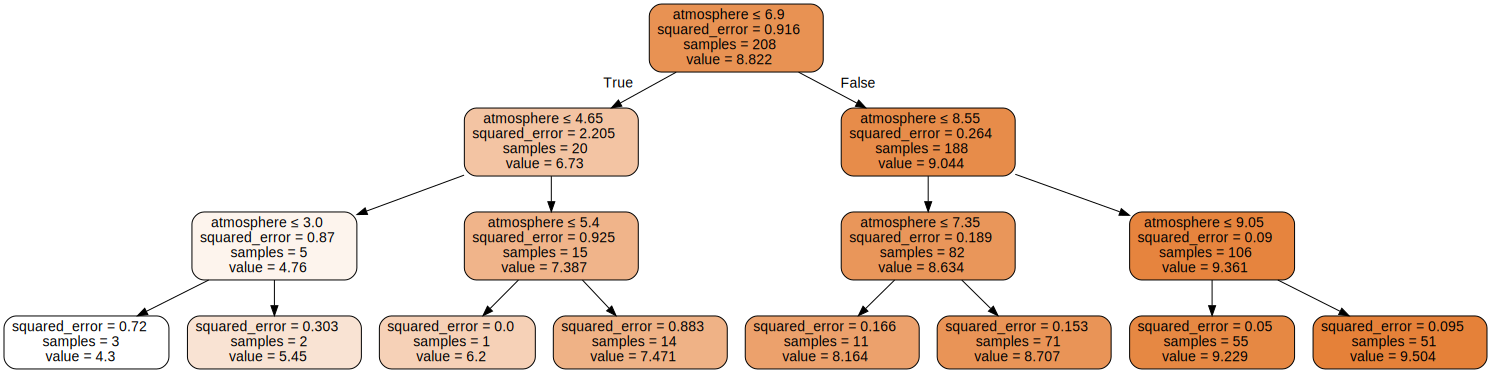

In [89]:
plot_tree_regression(dt_regression, features)

The better the atmosphere of the hostel the better the overall score seems to be.